<a href="https://colab.research.google.com/github/ohadtay/StrideSight/blob/main/pipeline1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

## Preparation

In [28]:
# prepare environment

!pip install -q mediapipe
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

# !wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2
from google.colab.patches import cv2_imshow

# img = cv2.imread("image.jpg")
# cv2_imshow(img)

!pip install azure-identity azure-storage-blob
!pip install --upgrade azure-storage-blob

!curl -sL https://aka.ms/InstallAzureCLIDeb | sudo bash
!az login



Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://packages.microsoft.com/repos/azure-cli jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


## Upload file

In [24]:
from google.colab import files
import os

def GetFileFromUser():

  uploaded = files.upload()

  # Check if any file was uploaded
  if uploaded:
    for filename in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=filename, length=len(uploaded[filename])))

      # Save the uploaded video to a file
      with open(filename, 'wb') as f:
        f.write(uploaded[filename])

      print(f"Saved video file as: {filename}")

      # Now you can proceed with processing the video using 'filename'
      # ... your video processing code here ...
      return filename
  else:
    print("No video file uploaded.")


filename = GetFileFromUser()

import os

def GetConvertedFileName(filename):
  base_dir, old_filename = os.path.split(filename)
  new_filename = os.path.splitext(old_filename)[0] + "_converted" + os.path.splitext(old_filename)[1]
  new_path = os.path.join(base_dir, new_filename)
  return new_path

converted_file_name = GetConvertedFileName(filename)

!ffmpeg -i "$filename" -vcodec libx264 "$converted_file_name" -hide_banner -loglevel error

print(f"converted file is at {converted_file_name}")

#upload to blob storage

from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient
import random
import string
import re

# Replace with your actual container name and blob name
container_name = "convertedvideos"

def GetBlobName(filename):
  base_dir, old_filename = os.path.split(filename)
  # Generate a random string prefix
  random_prefix = ''.join(random.choices(string.ascii_lowercase + string.digits, k=3))
  # Replace invalid characters with underscores
  valid_filename = re.sub(r'[^\w\-]', '_', old_filename)
  # Remove leading and trailing hyphens
  valid_filename = valid_filename.strip('-')
  # Remove consecutive hyphens
  valid_filename = re.sub(r'-+', '-', valid_filename)
  # Add prefix to the filename
  return f"{random_prefix}_{valid_filename}"

blob_name = GetBlobName(converted_file_name)

print(blob_name)
local_file_path = converted_file_name


# Create a BlobServiceClient object using the DefaultAzureCredential
blob_service_client = BlobServiceClient(account_url="https://eddiebkheethackathonsa.blob.core.windows.net", credential=DefaultAzureCredential())

# Create a container client
container_client = blob_service_client.get_container_client(container_name)

# Create container if not exists
if not container_client.exists():
    container_client.create_container()

# Create a blob client
blob_client = container_client.get_blob_client(blob_name)

# Upload the file
with open(local_file_path, "rb") as data:
    blob_client.upload_blob(data)

# Get and print the blob URL
blob_url = blob_client.url

print(f"successfully uploaded file to blob storage, url: {blob_url}")



Saving y2meta.net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k.mp4 to y2meta.net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k.mp4
User uploaded file "y2meta.net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k.mp4" with length 1554359 bytes
Saved video file as: y2meta.net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k.mp4
converted file is at y2meta.net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted.mp4
i38_y2meta_net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted_mp4
successfully uploaded file to blob storage, url: https://eddiebkheethackathonsa.blob.core.windows.net/convertedvideos/i38_y2meta_net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted_mp4


## Analyze video

In [ ]:
from google.colab import files
import io
import cv2
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow
import mediapipe as mp
import time


# Visualization function (same as before)
def draw_landmarks_on_image(rgb_image, detection_result):
    pose_landmarks_list = detection_result.pose_landmarks
    annotated_image = np.copy(rgb_image)

    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
            annotated_image,
            pose_landmarks_proto,
            solutions.pose.POSE_CONNECTIONS,
            solutions.drawing_styles.get_default_pose_landmarks_style())
    return annotated_image

# NormalizedLandmark to dict
def landmark_to_dict(landmark):
  return {
      'x': landmark.x,
      'y': landmark.y,
      'z': landmark.z,
      'visibility': landmark.visibility,
      'presence': landmark.presence,
  }

# MediaPipe setup (same as before)
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

def AnalyzeVideo(video_path):
  results = []
  # Video analysis with frame skipping for per-second analysis
  try:
      cap = cv2.VideoCapture(video_path)
      fps = cap.get(cv2.CAP_PROP_FPS)
      frame_skip = int(fps)  # Skip frames to process approximately every second
      frame_count = 0

      if not cap.isOpened():
          print("Error opening video file.")
      else:
          print("Analyzing the video file")
          while(cap.isOpened()):
              ret, frame = cap.read()
              if ret == True:
                  if frame_count % frame_skip == 0:  # Process every 'frame_skip' frames
                      image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                      detection_result = detector.detect(image)
                      results.append(
                          {
                              "frame_number": frame_count,
                              "results": [[landmark_to_dict(l) for l in person_landmarks] for person_landmarks in detection_result.pose_landmarks]
                          })
                      print(detection_result)

                      # annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
                      # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))  # Display the frame
                      # Add any further analysis or processing here using 'detection_result'
                      time.sleep(0.1) # to slow down video

                  frame_count += 1
                  if cv2.waitKey(1) & 0xFF == ord('q'):
                      break
              else:
                  break

      cap.release()
      cv2.destroyAllWindows()
  except Exception as e:
      print(f"An error occurred: {e}")
  return results

video_results = AnalyzeVideo(converted_file_name)

import json
json_res = json.dumps(video_results)

def GetResultsFileName(filename):
  base_dir, old_filename = os.path.split(filename)
  new_filename = os.path.splitext(old_filename)[0] + "_results.json"
  new_path = os.path.join(base_dir, new_filename)
  return new_path

results_path = GetResultsFileName(converted_file_name)
with open(results_path, 'w') as f:
  f.write(json_res)


Analyzing the video file
PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.52837735414505, y=0.34956657886505127, z=-0.13704726099967957, visibility=0.9999963045120239, presence=0.999998927116394), NormalizedLandmark(x=0.5379690527915955, y=0.3388161063194275, z=-0.11681853979825974, visibility=0.9999895095825195, presence=0.999997615814209), NormalizedLandmark(x=0.5447698831558228, y=0.33858567476272583, z=-0.11710856854915619, visibility=0.9999872446060181, presence=0.9999977350234985), NormalizedLandmark(x=0.5516788959503174, y=0.3382953107357025, z=-0.11696865409612656, visibility=0.9999914169311523, presence=0.9999972581863403), NormalizedLandmark(x=0.5186201930046082, y=0.3397630453109741, z=-0.1050303652882576, visibility=0.9999927282333374, presence=0.9999964237213135), NormalizedLandmark(x=0.51291424036026, y=0.3403419256210327, z=-0.10548699647188187, visibility=0.9999905824661255, presence=0.9999963045120239), NormalizedLandmark(x=0.5073979496955872, y=0.340828061

## Visualize Result

Recently uploaded blob url: https://eddiebkheethackathonsa.blob.core.windows.net/convertedvideos/ukx_y2meta_net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted_mp4
Paste blob url: https://eddiebkheethackathonsa.blob.core.windows.net/convertedvideos/ukx_y2meta_net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted_mp4
Choose frame to visualize: 61
Blob already exists at ./downloads/ukx_y2meta_net_720p-how-5k-running-paces-looks-on-a-treadmill-15-minutes-5k_converted_mp4
getting frame 61


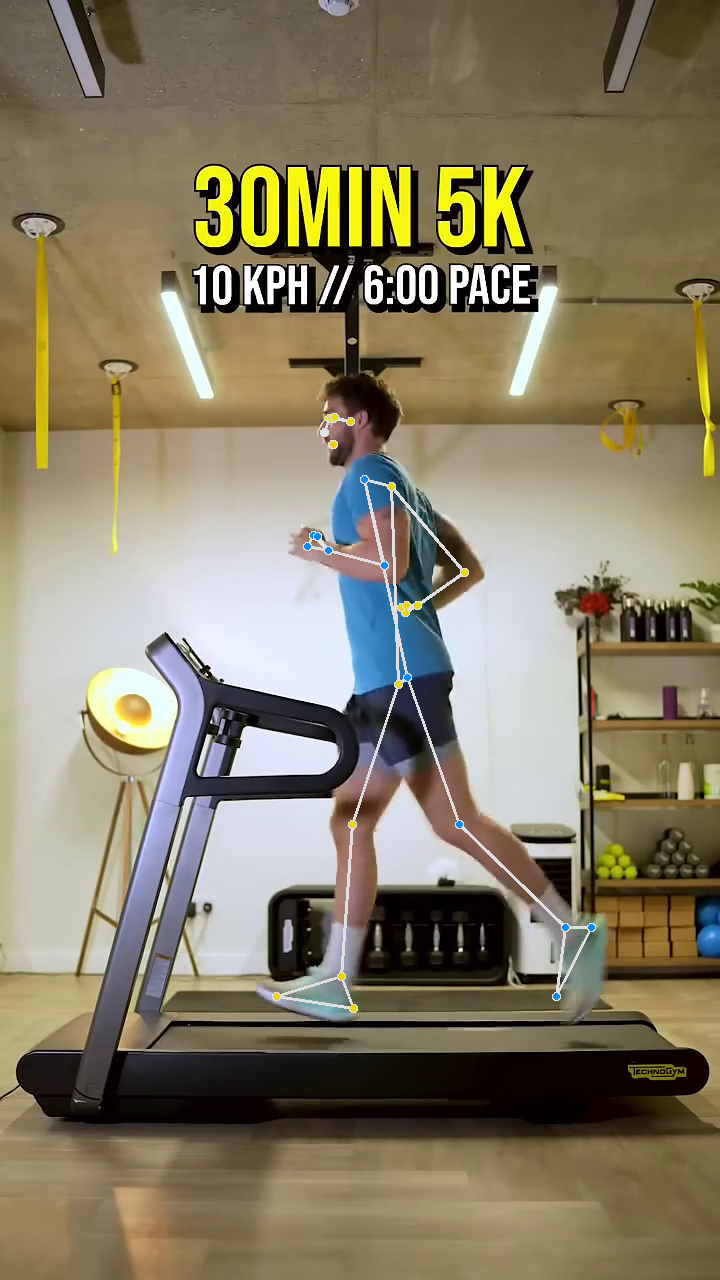

In [33]:
import os
from azure.storage.blob import BlobServiceClient, BlobClient
from urllib.parse import urlparse

print(f"Recently uploaded blob url: {blob_url}")
blob_url = input("Paste blob url: ")
frame_number = int(input("Choose frame to visualize: "))

from azure.storage.blob import BlobServiceClient

def download_blob_from_url(blob_url):
  """Downloads a blob from Azure Blob Storage given its URL.

  Args:
      blob_url: The URL of the blob to download.
      download_path: The local path where the blob should be saved.
  """
  # create ./downloads directory if not exists
  if not os.path.exists('./downloads'):
    os.makedirs('./downloads')
  blob_name = blob_url.split('/')[-1]
  download_path = os.path.join('./downloads', blob_name)

  # check if blob already exists in download
  if os.path.exists(download_path):
    print(f"Blob already exists at {download_path}")
    return download_path

  try:
    # Parse the blob URL
    parsed_url = urlparse(blob_url)
    account_url = f"{parsed_url.scheme}://{parsed_url.netloc}"
    container_name = parsed_url.path.split('/')[1]  # Get container name
    blob_name = parsed_url.path.split('/')[-1]     # Get blob name

    # Create a BlobServiceClient object
    blob_service_client = BlobServiceClient(account_url=account_url, credential=DefaultAzureCredential())

    # Create a BlobClient object
    blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

    # Download the blob
    with open(download_path, "wb") as download_file:
      download_file.write(blob_client.download_blob().readall())

    print(f"Blob downloaded successfully to {download_path}")
  except Exception as e:
    print(f"An error occurred: {e}")
  return download_path

# download blob (blob_url) to file named as the blob name:

video_file = download_blob_from_url(blob_url)


import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from google.colab.patches import cv2_imshow

# MediaPipe setup (same as before)
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)


# extract frame number X from video
def GetFrameFromVideo(video_file, frame_number):
  cap = cv2.VideoCapture(video_file)
  fps = cap.get(cv2.CAP_PROP_FPS)
  print(f"getting frame {frame_number}")
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
  ret, frame = cap.read()
  cap.release()
  return frame

frame = GetFrameFromVideo(video_file, frame_number)
# cv2_imshow(frame)

image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
detection_result = detector.detect(image)
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))  # Display the frame
